In [22]:
from data_helper import load_dump, dump_corpus
from topic_analysis import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.svm import SVC
import numpy as np
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import warnings
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
warnings.filterwarnings('ignore')

In [3]:
all_data = load_dump("train_dev_df")

In [4]:
all_posts = all_data.post
ill = all_data[all_data["label"] == 1].post
healthy = all_data[all_data["label"] == 0].post

In [ ]:
from sklearn.utils import shuffle


In [56]:
vec = CountVectorizer(max_features=100000, min_df=3, max_df=0.7)

In [57]:
vec.fit(all_posts)
vec_all = vec.transform(all_posts)

In [58]:
# all_df["post"] = vec_all
num_topics = 15

In [59]:
lda = LatentDirichletAllocation(n_components=num_topics,
                                learning_method='batch',
                                max_iter=50)

In [60]:
lda = lda.fit(vec_all)

In [61]:
corpus = lda.transform(vec_all)

In [62]:
all_data["lda_feature"] = [corpus[i, :] for i in range(corpus.shape[0])]

In [63]:
most_probable_topics = get_doc_top_topics_probs(corpus, 1)
all_data["topic_id"] = most_probable_topics

# TSNE visualization

In [64]:
perplexities = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
iters = [300, 400, 500, 600, 700, 800, 900, 1000]
palette = sns.color_palette("husl", num_topics)

In [71]:
def scatter(x, y, topic_lbls):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", num_topics))

    # We create a scatter plot.
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:], y[:], lw=0, s=40,
                    c=palette[topic_lbls])
    
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
#     ax.axis('off')
    ax.axis('tight')
    plt.show()
#     # We add the labels for each digit.
#     txts = []
#     for i in range(10):
#         # Position of each label.
#         xtext, ytext = np.median(x[colors == i, :], axis=0)
#         txt = ax.text(xtext, ytext, str(i), fontsize=24)
#         txt.set_path_effects([
#             PathEffects.Stroke(linewidth=5, foreground="w"),
#             PathEffects.Normal()])
#         txts.append(txt)

#     return ax, sc

-----------------------------
Perplexity: 10
Iterations: 300


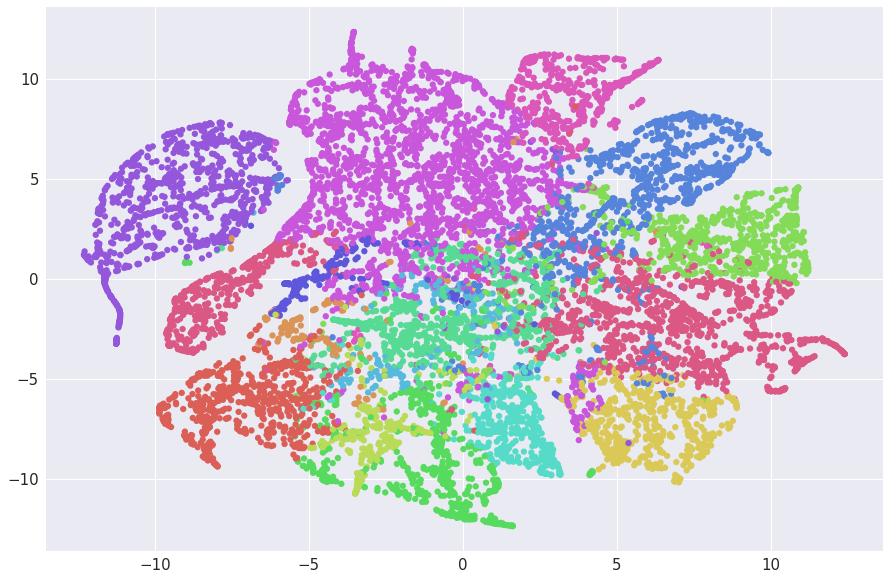

-----------------------------
Perplexity: 10
Iterations: 400


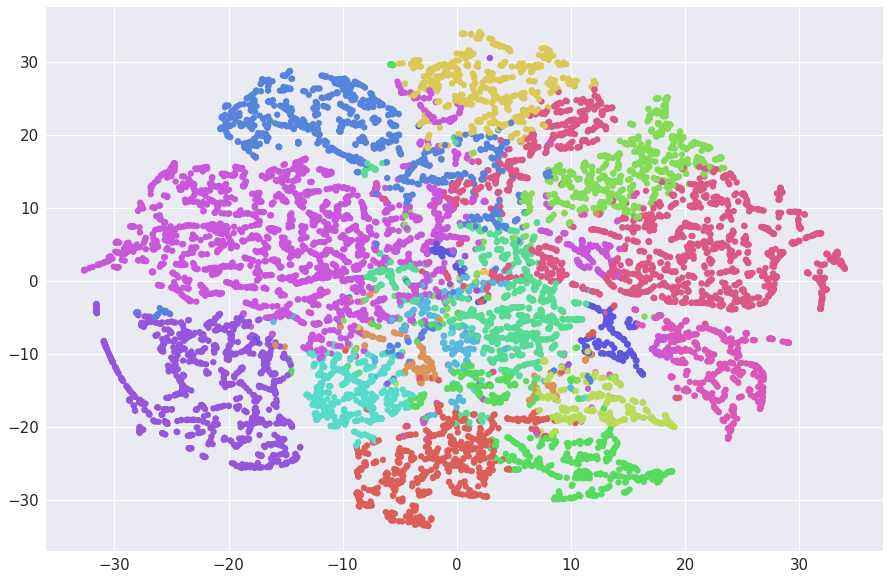

-----------------------------
Perplexity: 10
Iterations: 500


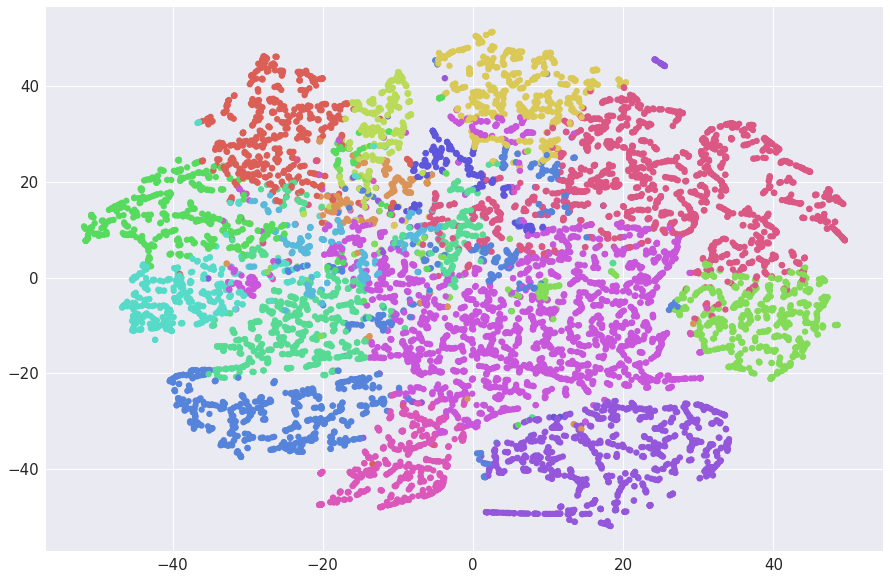

-----------------------------
Perplexity: 10
Iterations: 600


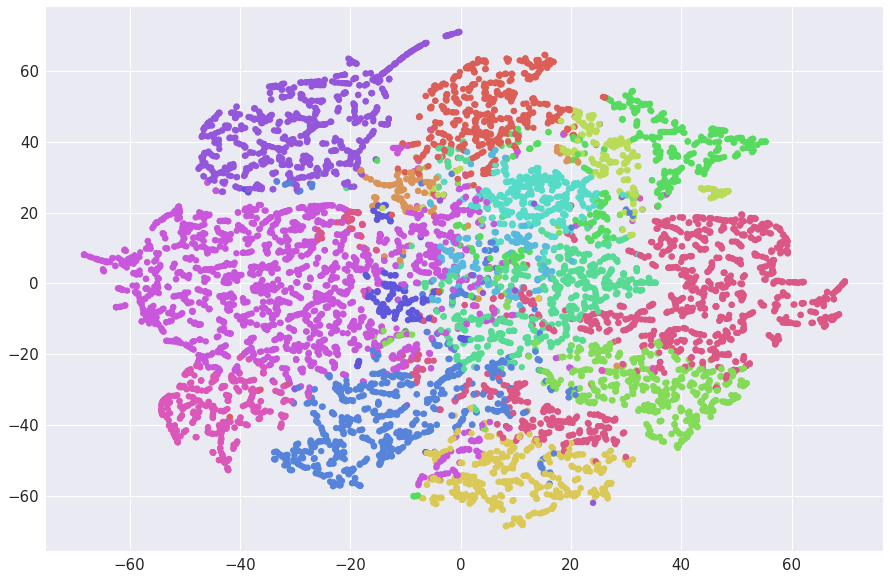

-----------------------------
Perplexity: 10
Iterations: 700


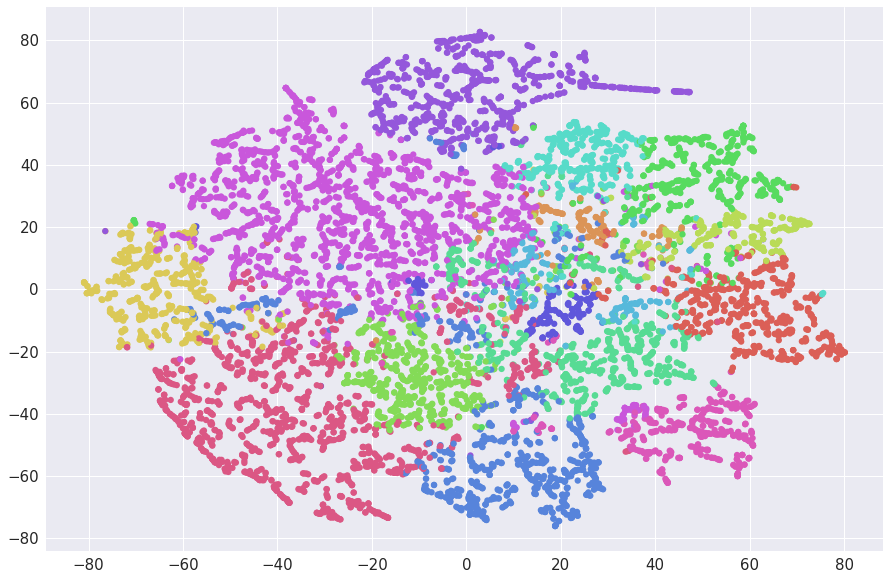

-----------------------------
Perplexity: 10
Iterations: 800


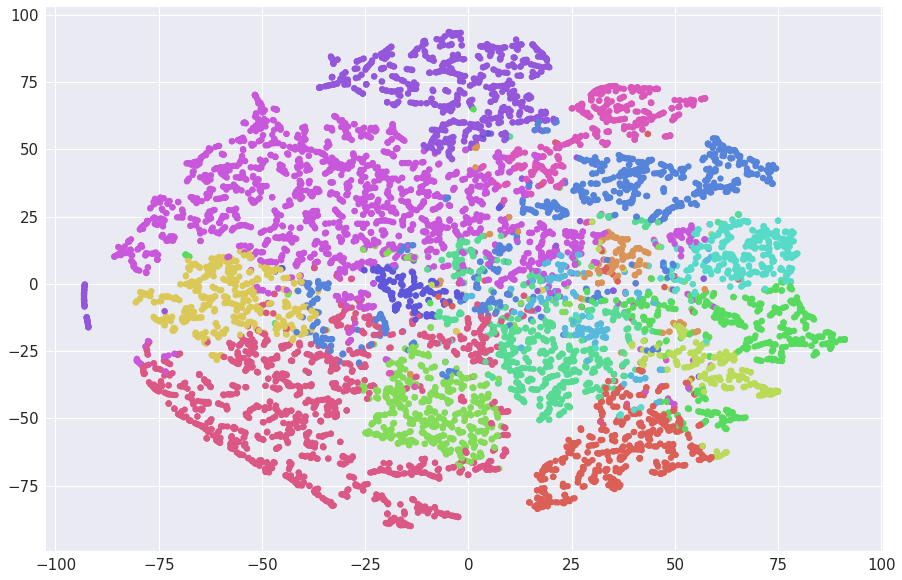

-----------------------------
Perplexity: 10
Iterations: 900


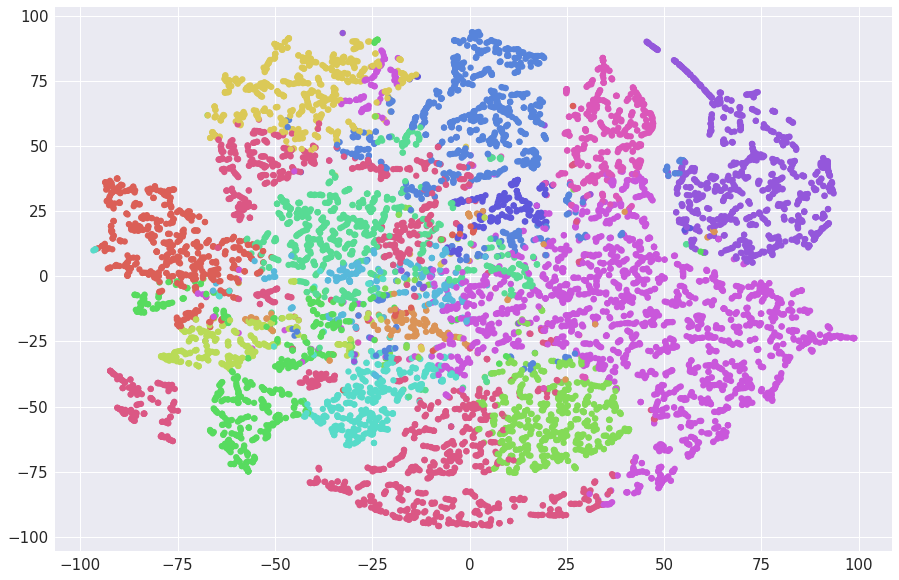

-----------------------------
Perplexity: 10
Iterations: 1000


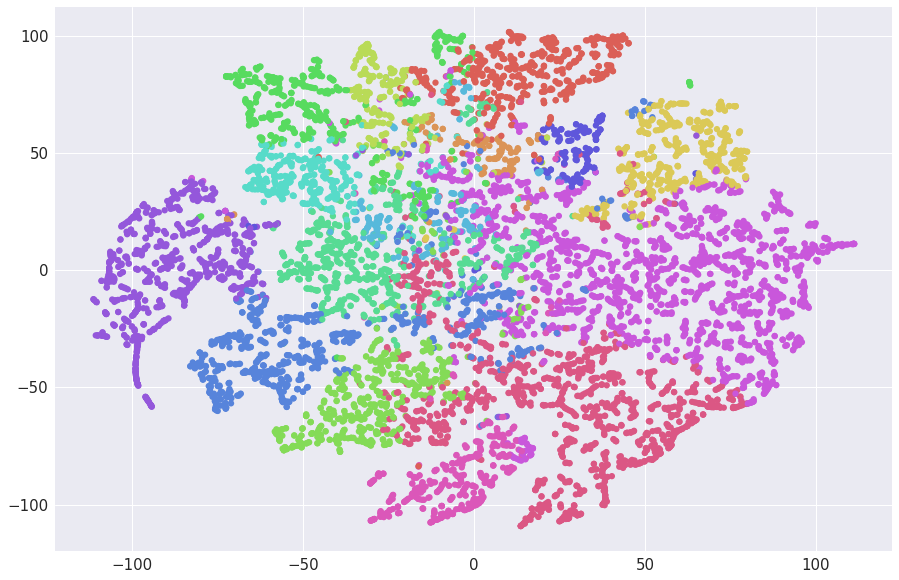

In [ ]:
for prp in perplexities:
    for itr in iters:
        tsne = TSNE(n_components=2, perplexity=prp, n_iter=itr)
        tsne_results = tsne.fit_transform(corpus)
        x = tsne_results[:, 0]
        y = tsne_results[:, 1]
        print("-----------------------------")
        print("Perplexity:", prp)
        print("Iterations:", itr)
        scatter(x, y, all_data["topic_id"])

In [43]:
all_data["x_tsne"] = tsne_results[:, 0]
all_data["y_tsne"] = tsne_results[:, 1]

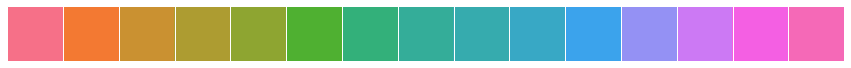

In [44]:
sns.palplot(palette)

In [46]:
lbls = np.arange(num_topics)

In [47]:
lbls

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2b33ac2978>,
 <matplotlib.collections.PathCollection at 0x7f2b33c73198>)

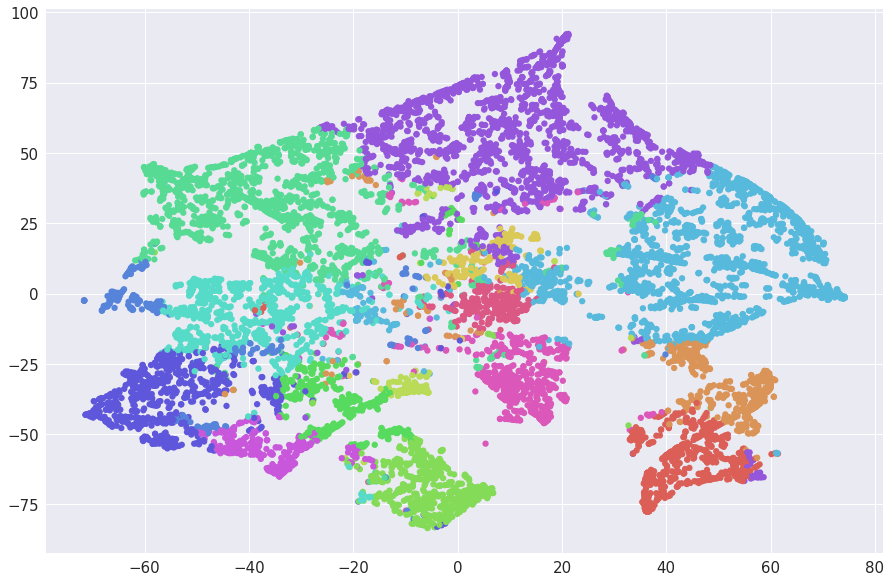

In [49]:
scatter(all_data["x_tsne"], all_data["y_tsne"], all_data["topic_id"])

In [71]:
features = all_data.loc[:]["lda_feature"]
lda_features = np.vstack(features)

# Kmeans

In [245]:
kmeans = KMeans(n_clusters=15, random_state=10)
transformed_features = kmeans.fit_transform(corpus)

In [246]:
transformed_features.shape

(11157, 15)

In [247]:
y_kmeans = kmeans.predict(corpus)

In [248]:
centroids = kmeans.cluster_centers_
centroids

array([[0.10553155, 0.06345868, 0.02580854, 0.06626884, 0.0198515 ,
        0.0175292 , 0.01806679, 0.02592167, 0.03733584, 0.02474343,
        0.39091781, 0.03887434, 0.03223857, 0.10693746, 0.02651579],
       [0.43134236, 0.0085587 , 0.07379961, 0.06143689, 0.01042193,
        0.0226289 , 0.01910127, 0.06676062, 0.05385601, 0.01902403,
        0.04191219, 0.13086813, 0.02468173, 0.00760831, 0.02799932],
       [0.11454441, 0.00408658, 0.07434276, 0.0269171 , 0.0034621 ,
        0.00781129, 0.00698789, 0.01818831, 0.01834068, 0.00500223,
        0.01384189, 0.6812725 , 0.01171558, 0.00485118, 0.00863548],
       [0.02692601, 0.0019487 , 0.01209121, 0.00888949, 0.09988651,
        0.68985202, 0.09109054, 0.01415024, 0.01930719, 0.00597002,
        0.00786461, 0.0050003 , 0.00978915, 0.00212187, 0.00511216],
       [0.04326339, 0.05485204, 0.04241873, 0.54237815, 0.01454761,
        0.0138966 , 0.01232755, 0.0446681 , 0.03762207, 0.01685844,
        0.02340002, 0.04403921, 0.06442143, 

In [249]:
all_data["cluster_id"] = y_kmeans

In [77]:
from sklearn.manifold import MDS

In [250]:
# mds = MDS(n_components=2, random_state=1, n_jobs=-2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)


In [251]:
scaled_features = pca.fit_transform(transformed_features)


In [252]:
x_pca = scaled_features[:, 0]
y_pca = scaled_features[:, 1]

In [253]:
x_pca.shape

(11157,)

In [254]:
y_pca.shape

(11157,)

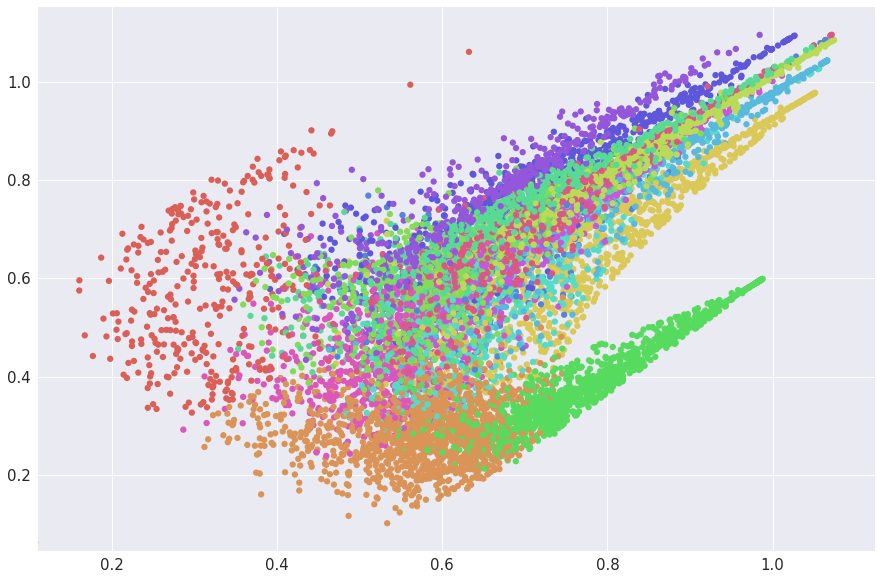

In [255]:
scatter(transformed_features[:, 0], transformed_features[:, 1], filtered_all["cluster_id"])
plt.scatter(centroids[:, 0], centroids[:, 1], color="b")